**** THE MODEL ONLY IS EFFICIENT FOR 10% OF THE DATASET FOR 16 PERSONALITIES ****

Hence, instead of selecting all 16 types of personalitys as a unique feature I explored the dataset further and decided to simplify it.
The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

Introversion (I) – Extroversion (E)
Intuition (N) – Sensing (S)
Thinking (T) – Feeling (F)
Judging (J) – Perceiving (P)

We will use this and create 4 classifyers to classify the person

**** I / E **** 

In [22]:
# Creating a classifyer for Introversion (I) and Extroversion (E)
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('I' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'introvert') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'extrovert') \
        for i in temp1]]

In [23]:
# Data for mining 
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [24]:
# Training the model
IntroExtro = NaiveBayesClassifier.train(train)

In [25]:
# Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(IntroExtro, train)*100

80.76528975232102

In [26]:
# Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [27]:
# Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(IntroExtro, test)*100

58.10536771096304

For classifiers for I/J, testing the model with data it has not seen before produces about an 58% of accuracy

**** N / S ****

In [29]:
# Creating a classifyer for Intuition (N) and Sensing (S)
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('N' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Intuition') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Sensing') \
        for i in temp1]]

In [31]:
# Data for training
train=[]
for i in range(16):
    train += features[i][:split[i]] 

In [32]:
# Training the model
IntuitionSensing = NaiveBayesClassifier.train(train)

In [33]:
# Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(IntuitionSensing, train)*100

70.012146586034

In [34]:
# Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [35]:
# Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(IntuitionSensing, test)*100

54.433447788325594

**** T / F ****

In [42]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('T' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Thinking') \
        for i in temp1]]
    if('F' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Feeling') \
        for i in temp1]]

In [43]:
# Data for training
for i in range(16):
    train += features[i][:split[i]]

In [44]:
# Training the model
ThinkingFeeling = NaiveBayesClassifier.train(train)

In [45]:
# Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(ThinkingFeeling, train)*100

52.68936006680905

In [46]:
# Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [47]:
# Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(ThinkingFeeling, test)*100

47.99072962794355

**** Creating a classifyer for Judging (J) and Percieving (P)****

In [48]:
# Features for the bag of words model
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('J' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Judging') \
        for i in temp1]]
    if('P' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Percieving') \
        for i in temp1]]


In [49]:
# Data for training
train=[]
for i in range(16):
    train += features[i][:split[i]]

In [50]:
# Training the model
JudgingPercieiving = NaiveBayesClassifier.train(train)

In [51]:
# Testing the model on the dataset it was trained for accuracy
nltk.classify.util.accuracy(JudgingPercieiving, train)*100

79.38458035335397

In [52]:
# Creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [53]:
# Testing the model on the test dataset which it has never seen before
nltk.classify.util.accuracy(JudgingPercieiving, test)*100

54.38480321152175

**** Summary ****

In [54]:
temp = {'train' : [81.12443979837917,70.14524215640667,80.03456948570128,79.79341109742592], 'test' : [58.20469312585358,54.46262259027357,59.41315234035509,54.40549600629061]}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])
results

,Introvert - Extrovert,Intuition - Sensing,Thinking - Feeling,Judging - Percieiving
train,81.124440,70.145242,80.034569,79.793411
test,58.204693,54.462623,59.413152,54.405496


Text(0.5, 1.0, 'Total posts for each personality type')

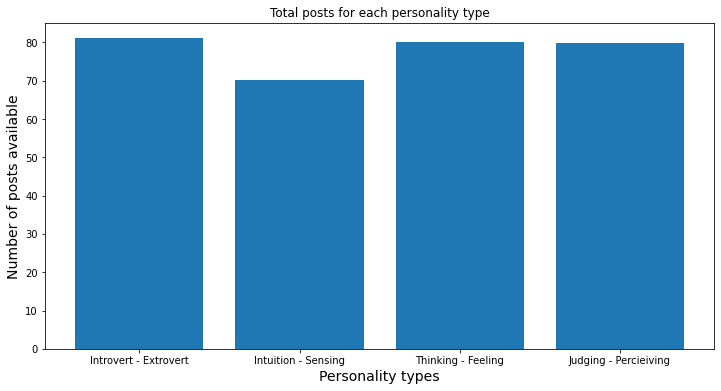

In [55]:
# Data visualisation

plt.figure(figsize = (12,6))

plt.bar(np.array(results.columns), height = results.loc['train'],)
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

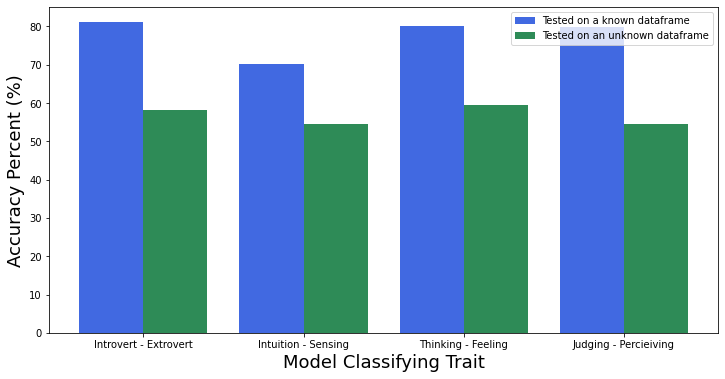

In [56]:
labels = np.array(results.columns)

training = results.loc['train']
ind = np.arange(4)
width = 0.4
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, training, width, color='royalblue')

testing = results.loc['test']
rects2 = ax.bar(ind+width, testing, width, color='seagreen')

fig.set_size_inches(12, 6)
fig.savefig('Results.png', dpi=200)

ax.set_xlabel('Model Classifying Trait', size = 18)
ax.set_ylabel('Accuracy Percent (%)', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.legend((rects1[0], rects2[0]), ('Tested on a known dataframe', 'Tested on an unknown dataframe'))
plt.show()

In [ ]:
## Testing the models to predict my trait my feeding few of my quora writings ##
# void...